In [ ]:
from pg import GeneticProgramming

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
import random
import math

sns.set()

: 

In [14]:
# Configuration A: Static Penalty 
gp_a = GeneticProgramming(pop_size=100, num_generations=100, tournament_size=10, mutation_rate=0.125, penalty_method="static_penalty")
results_a = []
for _ in range(30):
    best_solutions_a = gp_a.run()
    results_a.append([gp_a.evaluate(solution) for solution in best_solutions_a])

# Configuration B: ɛ-constrained method
gp_b = GeneticProgramming(pop_size=100, num_generations=100, tournament_size=10, mutation_rate=0.125, penalty_method="epsilon_constraint")
results_b = []
for _ in range(30):
    best_solutions_b = gp_b.run()
    results_b.append([gp_b.evaluate(solution) for solution in best_solutions_b])

# Configuration A: Static Penalty 
table_a = []
for i, result in enumerate(results_a):
    row = [i + 1, statistics.mean(result), min(result), max(result), statistics.stdev(result)]
    table_a.append(row)

# Configuration B: ɛ-constrained method
table_b = []
for i, result in enumerate(results_b):
    row = [i + 1, statistics.mean(result), min(result), max(result), statistics.stdev(result)]
    table_b.append(row)

# Print the table
print("Configuration A: Statyc Penalty")
print("{:<5s} {:<10s} {:<10s} {:<10s} {:<10s}".format("Run", "Mean", "Min", "Max", "Std Dev"))
for row in table_a:
    print("{:<5d} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(*row))

print()

print("Configuration B: ɛ-constrained method")
print("{:<5s} {:<10s} {:<10s} {:<10s} {:<10s}".format("Run", "Mean", "Min", "Max", "Std Dev"))
for row in table_b:
    print("{:<5d} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(*row))

Configuration A: Statyc Penalty
Run   Mean       Min        Max        Std Dev   
1     -12.1017   -13.8361   -1.8780    2.4918    
2     -12.0856   -13.7795   -3.0069    2.1943    
3     -12.1409   -13.8770   -3.0097    1.8657    
4     -12.8929   -14.5028   -3.2117    2.0864    
5     -12.1870   -14.6588   -2.7118    2.4134    
6     -12.6497   -14.1410   -4.7452    1.9514    
7     -10.7492   -11.9522   -3.2993    1.6766    
8     -12.7775   -13.9090   -4.7409    1.9998    
9     -12.1329   -14.1697   -3.3100    2.0260    
10    -12.3993   -14.4827   -3.2534    2.1004    
11    -12.9025   -14.2903   -3.9807    2.1095    
12    -12.6486   -14.2219   -2.9627    2.2058    
13    -12.3378   -14.1936   -3.0330    2.5040    
14    -11.6633   -13.2265   -3.6248    2.1051    
15    -12.9151   -14.3844   -2.8957    2.3506    
16    -12.6045   -13.8683   -3.1410    2.1149    
17    -12.5265   -14.2102   -3.3480    2.0904    
18    -11.6715   -14.2928   -3.4884    2.0939    
19    -12.5885   -

In [68]:
mean_col_a = []    
min_col_a = []  
max_col_a = [] 
std_col_a = []

mean_col_b = []
min_col_b = []
max_col_b = []
std_col_b = []

for row in table_a:
    mean_col_a.append(table_a[row[0]-1][1])
    min_col_a.append(table_a[row[0]-1][2])
    max_col_a.append(table_a[row[0]-1][3])
    std_col_a.append(table_a[row[0]-1][4])
    mean_col_b.append(table_b[row[0]-1][1])
    min_col_b.append(table_b[row[0]-1][2])
    max_col_b.append(table_b[row[0]-1][3])
    std_col_b.append(table_b[row[0]-1][4])

In [78]:
dictionary = {'mean': [statistics.mean(mean_col_a), statistics.mean(mean_col_b)], 'min': [min(min_col_a), min(min_col_b)], 
              'max': [max(max_col_a), max(max_col_b)], 'std':[statistics.stdev(std_col_a), statistics.stdev(std_col_b)]}
dictionary

{'mean': [-12.299521162165275, -12.18405389361785],
 'min': [-14.658807152813758, -14.691385743992324],
 'max': [-1.877960322295721, -2.0884170407687868],
 'std': [0.24854938594424658, 0.3172158149320576]}

In [83]:
df = pd.DataFrame(data=dictionary)
df

,mean,min,max,std
0,-12.299521,-14.658807,-1.877960,0.248549
1,-12.184054,-14.691386,-2.088417,0.317216


<AxesSubplot: xlabel='mean'>

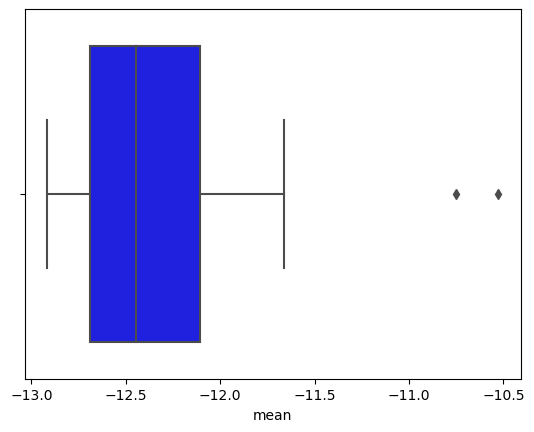

In [81]:
# Configuração das cores dos boxplots
cores = ['blue', 'red', 'green', 'orange']

# Criação da figura e do eixo
fig, ax = plt.subplots()

# Criação dos boxplots
bp = ax.boxplot(df, patch_artist=True, notch=True)

# Personalização das cores dos boxplots
for box, cor in zip(bp['boxes'], cores):
    box.set(color=cor, linewidth=2)
    box.set(facecolor='lightgray')

# Personalização dos outliers
for flier in bp['fliers']:
    flier.set(marker='o', color='black', alpha=0.5)

# Personalização das medianas
for median in bp['medians']:
    median.set(color='black', linewidth=2)

# Personalização das whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1.5, linestyle='--')

# Personalização dos caps
for cap in bp['caps']:
    cap.set(color='black', linewidth=1.5)

# Rótulos dos eixos x
labels = ['Média', 'Mínimo', 'Máximo', 'Desvio Padrão']
ax.set_xticklabels(labels)

# Título do gráfico
ax.set_title('Boxplot das Métricas')

# Exibição do gráfico
plt.show()